In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import required packages
import re
import pandas as pd
import numpy as np
from PIL import Image

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
# read the dataset into a dataframe
df = pd.read_csv('../data/cyberbullying_tweets.csv')

# dataset shape: (rows, columns)
display(df.shape)

# first 5 datapoints
display(df.head())

# 5 random samples
display(df.sample(5))

(47692, 2)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


,tweet_text,cyberbullying_type
3731,I don't retreat. I reload.,not_cyberbullying
13660,"How does it feel supporting misogyny, racism, ...",gender
37194,There are bullies everywhere not just in High ...,age
42876,"“@tayyoung_: FUCK OBAMA, dumb ass nigger” &lt;...",ethnicity
23168,@ajwatamr @YRohaibani Coming from a scum bag t...,religion


religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


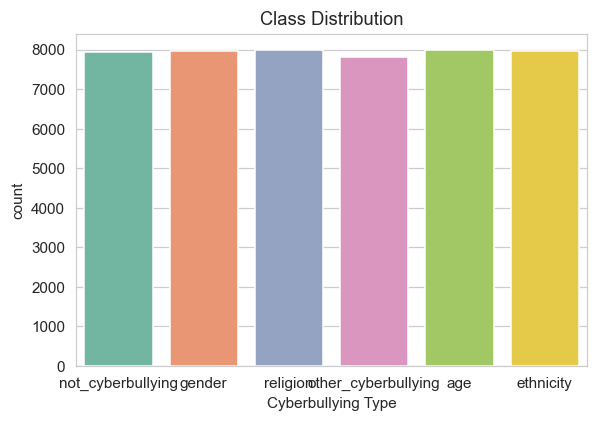

In [4]:
# class distribution
print(df['cyberbullying_type'].value_counts())

# plot the class distribution
plt.figure(dpi=110)
chart = sns.countplot(x="cyberbullying_type", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Cyberbullying Type')
plt.show()

In [5]:
# check null value counts
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [6]:
# split into train-validation-test sets (60-20-20)
# perform a random split

# train-test split (80-20)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# train-validation split (80-20)
# 0.8 * 0.25 = 0.2
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=42)

# rest index
df_train.reset_index()
df_valid.reset_index()
df_test.reset_index()

# size of train-validation-test sets
print('train:',df_train.shape[0])
print('valid:',df_valid.shape[0])
print('test:',df_test.shape[0])

# save validation set
df_valid.to_csv('../data/valid_data.csv', index=False)

# save test set
df_test.to_csv('../data/test_data.csv', index=False)

train: 28614
valid: 9539
test: 9539


In [7]:
# instantiate a word lemmatizer
lemma = WordNetLemmatizer()

# load all the english stopwords
stop_words = stopwords.words('english')

# total stopwords
print(len(stop_words))

# first 10 stopwords
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [8]:
## define the cleaning and preprocessing actions
# convert text to lowercase
# remove links
# tokenization
# remove stop words
# lemmatization
# remove all words with length less than 3
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+',' ',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(w) for w in text]
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

In [9]:
# preprocess the tweet_text column
df_train['clean_tweet'] = df['tweet_text'].apply(clean_text)

display(df_train.loc[:,['tweet_text', 'clean_tweet']].head())

,tweet_text,clean_tweet
36167,i hate ppl from high school y’all used to bull...,hate ppl high school used bully hot omg love m...
6828,Kat and Andre are such assholes OMG #mkr,kat andre asshole omg mkr
33349,"if she is new,she will not have access to go t...",new access trading cause need high level opini...
45739,Fuck David duke racist who thinks America belo...,fuck david duke racist think america belong du...
28246,I May not say it a lot but I hate apologetic A...,may say lot hate apologetic army hope choke ev...


In [10]:
# clean train set
df_train_cleaned = df_train.loc[:,['clean_tweet', 'cyberbullying_type']]

# save the cleaned train set
df_train_cleaned.to_csv('../data/train_data.csv', index=False)

display(df_train_cleaned.sample(10))

,clean_tweet,cyberbullying_type
1279,colinsines hope health better amp family well,not_cyberbullying
4081,square circle,not_cyberbullying
12989,petty marshall basically could use woman notse...,gender
32396,omg literally bully school,age
30315,korvys target ideal,other_cyberbullying
14678,seanbedllam avoid show find fat joke gay joke ...,gender
36101,would share someone interview see say wanting ...,age
12617,still bad flirting lady game end doin,gender
22047,nigeria contraption country sponsoring deadlie...,religion
546,love pink campaign self love anti bullying ova...,not_cyberbullying


## WordCloud: Not cyberbullying tweets
----

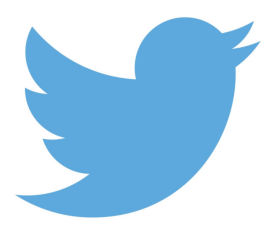

In [11]:
# create a mask for wordcloud
twitter_mask = np.array(Image.open('../images/logo1.png'))
plt.axis('off')
plt.imshow(twitter_mask)
plt.show()

colormap = 'Set2'

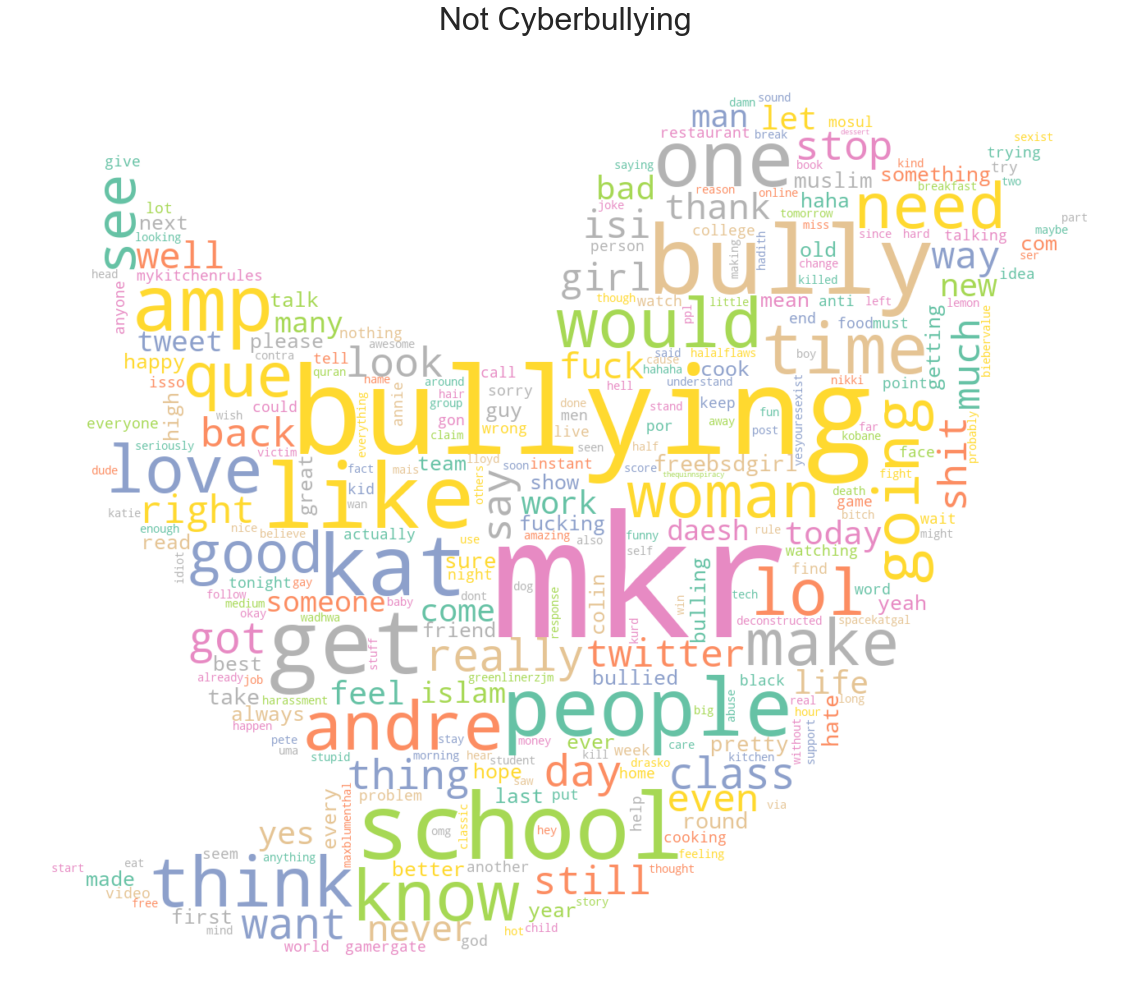

In [12]:
# wordcloud for not_cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'not_cyberbullying'].clean_tweet)))

plt.axis('off')
plt.title('Not Cyberbullying', fontsize=32, pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig("../images/wordcloud-not-cyberbullying.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: All cyberbullying tweets
----

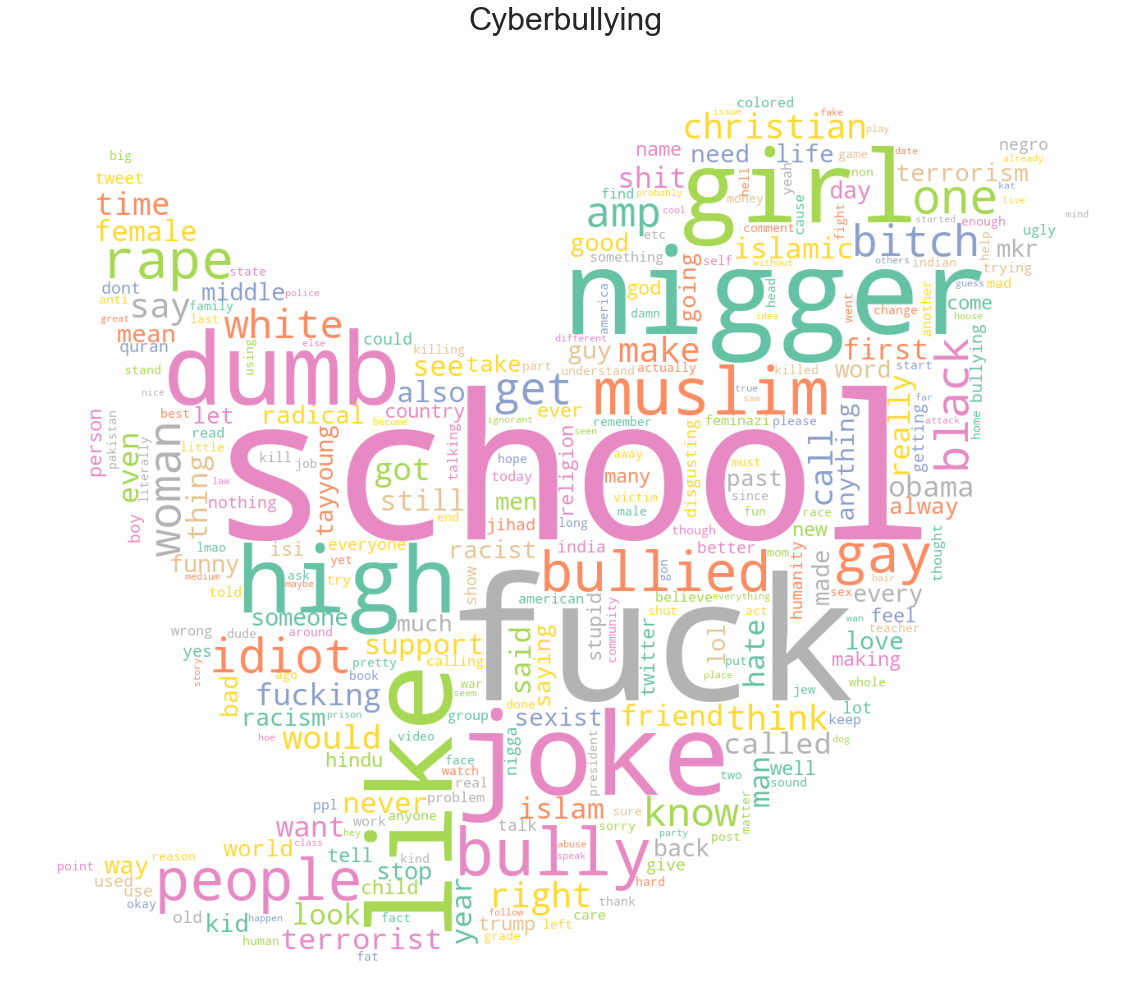

In [13]:
# wordcloud for all cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] != 'not_cyberbullying'].clean_tweet)))

plt.axis('off')
plt.title('Cyberbullying', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../images/wordcloud-cyberbullying.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Age cyberbullying tweets
----

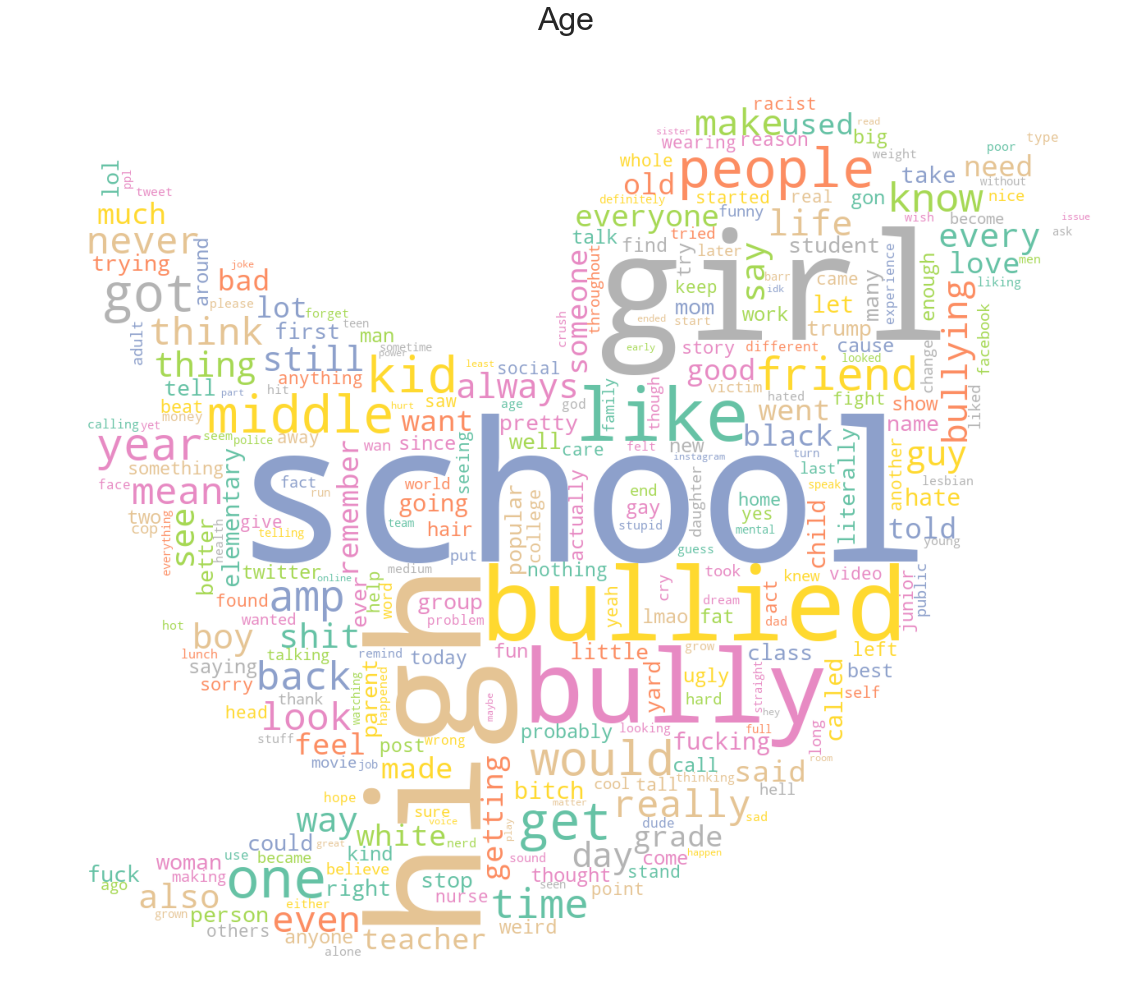

In [14]:
# wordcloud for age cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'age'].clean_tweet)))

plt.axis('off')
plt.title('Age', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../images/wordcloud-age.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Ethnicity cyberbullying tweets
----

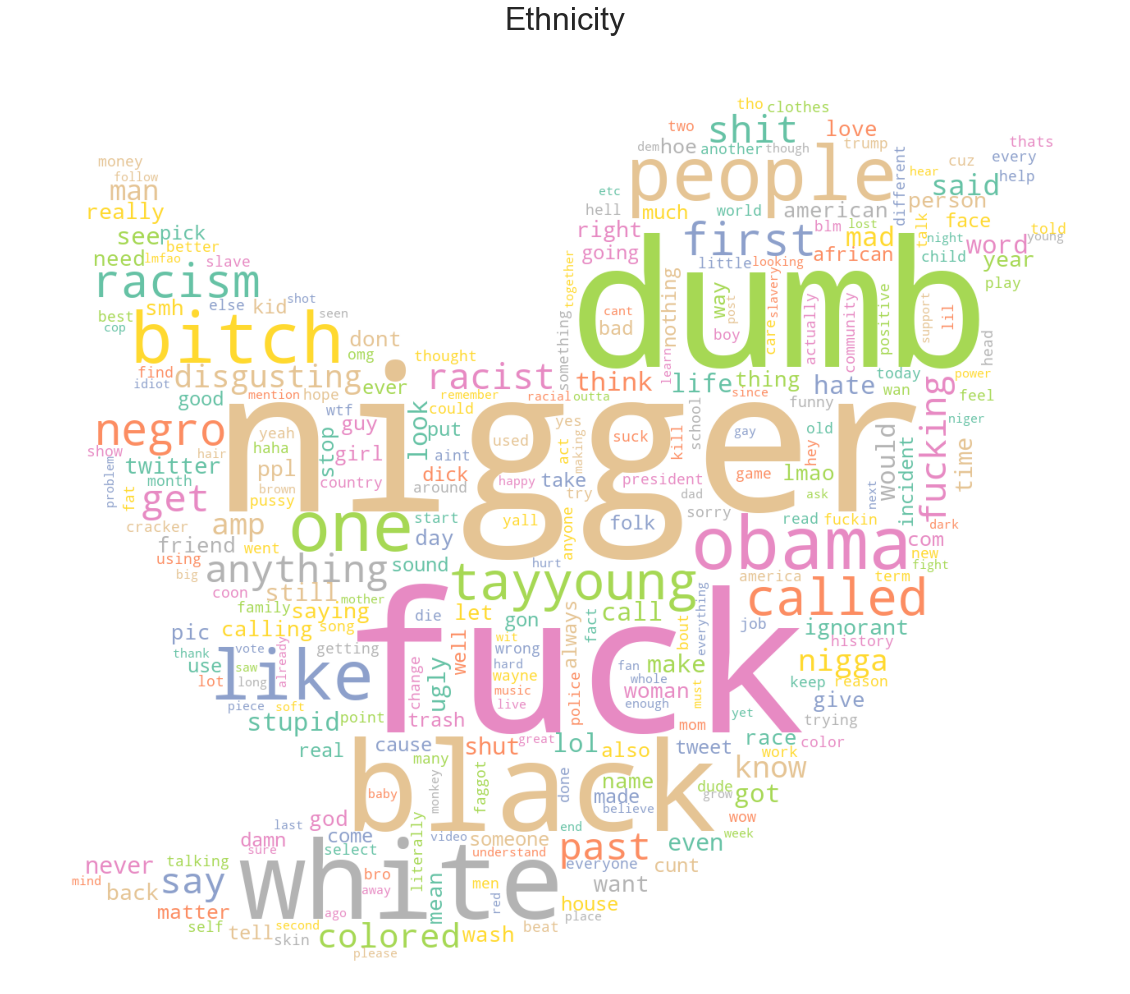

In [15]:
# wordcloud for ethnicity cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'ethnicity'].clean_tweet)))

plt.axis('off')
plt.title('Ethnicity', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../images/wordcloud-ethnicity.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Gender cyberbullying tweets
----

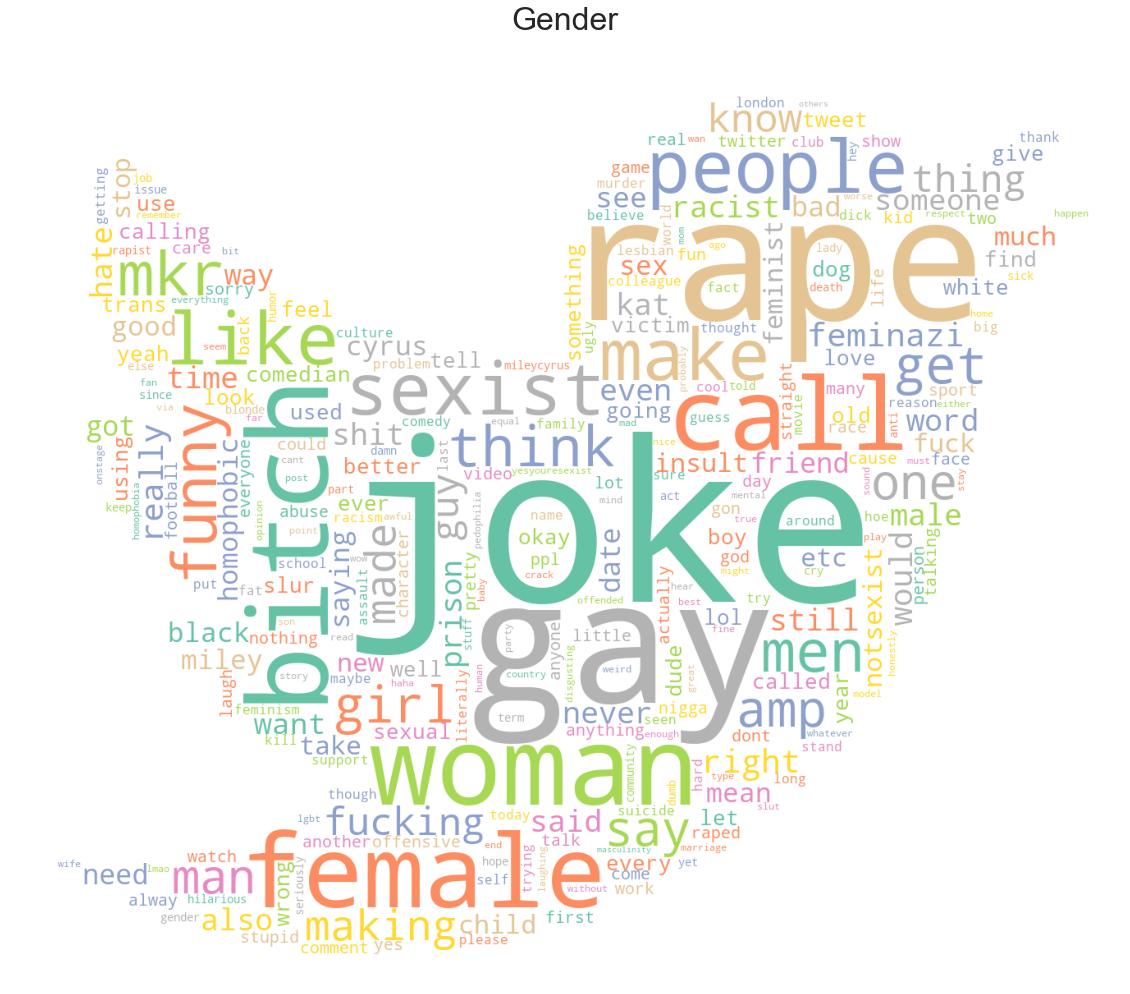

In [16]:
# wordcloud for gender cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'gender'].clean_tweet)))

plt.axis('off')
plt.title('Gender', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../images/wordcloud-gender.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Religion cyberbullying tweets
----

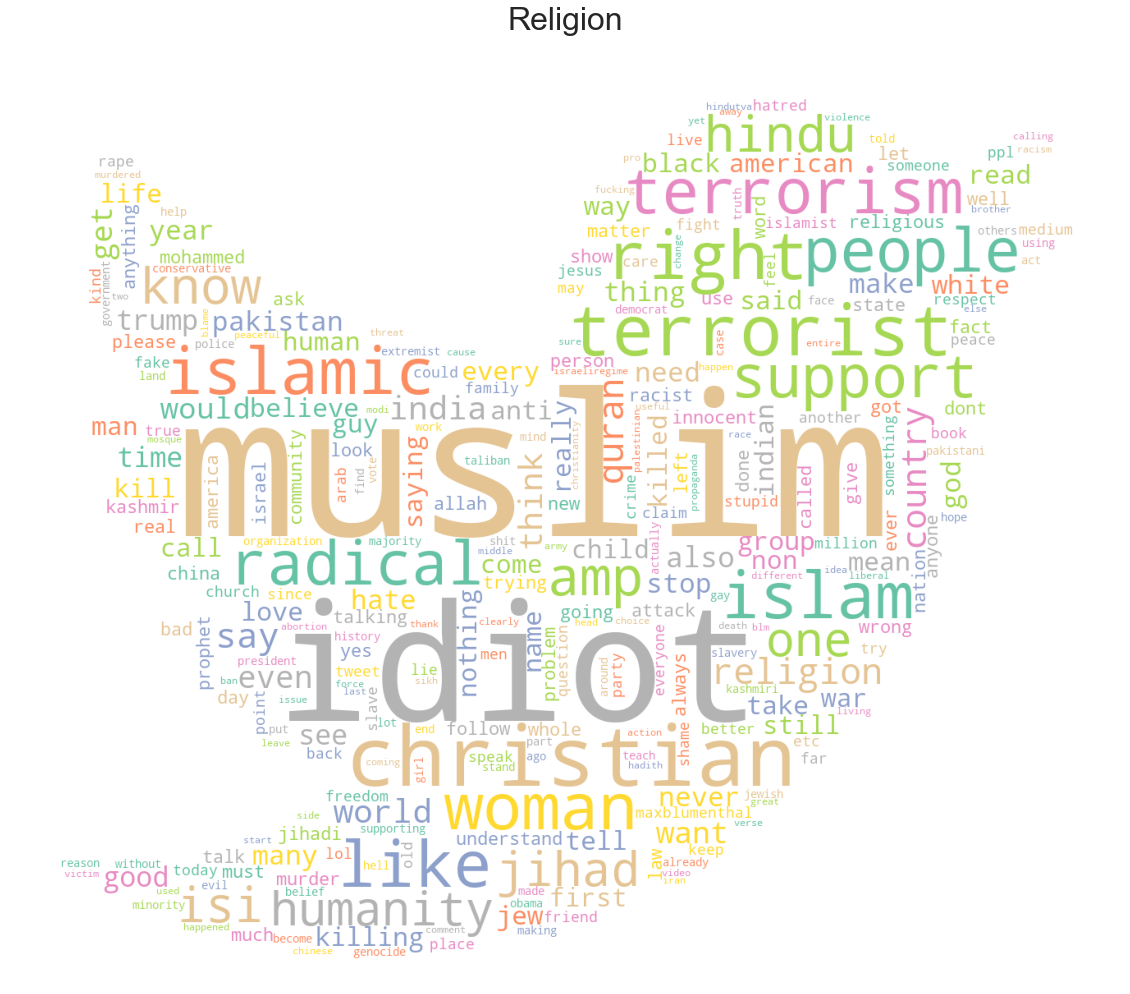

In [17]:
# wordcloud for religion cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'religion'].clean_tweet)))

plt.axis('off')
plt.title('Religion', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../images/wordcloud-religion.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Other cyberbullying tweets
----

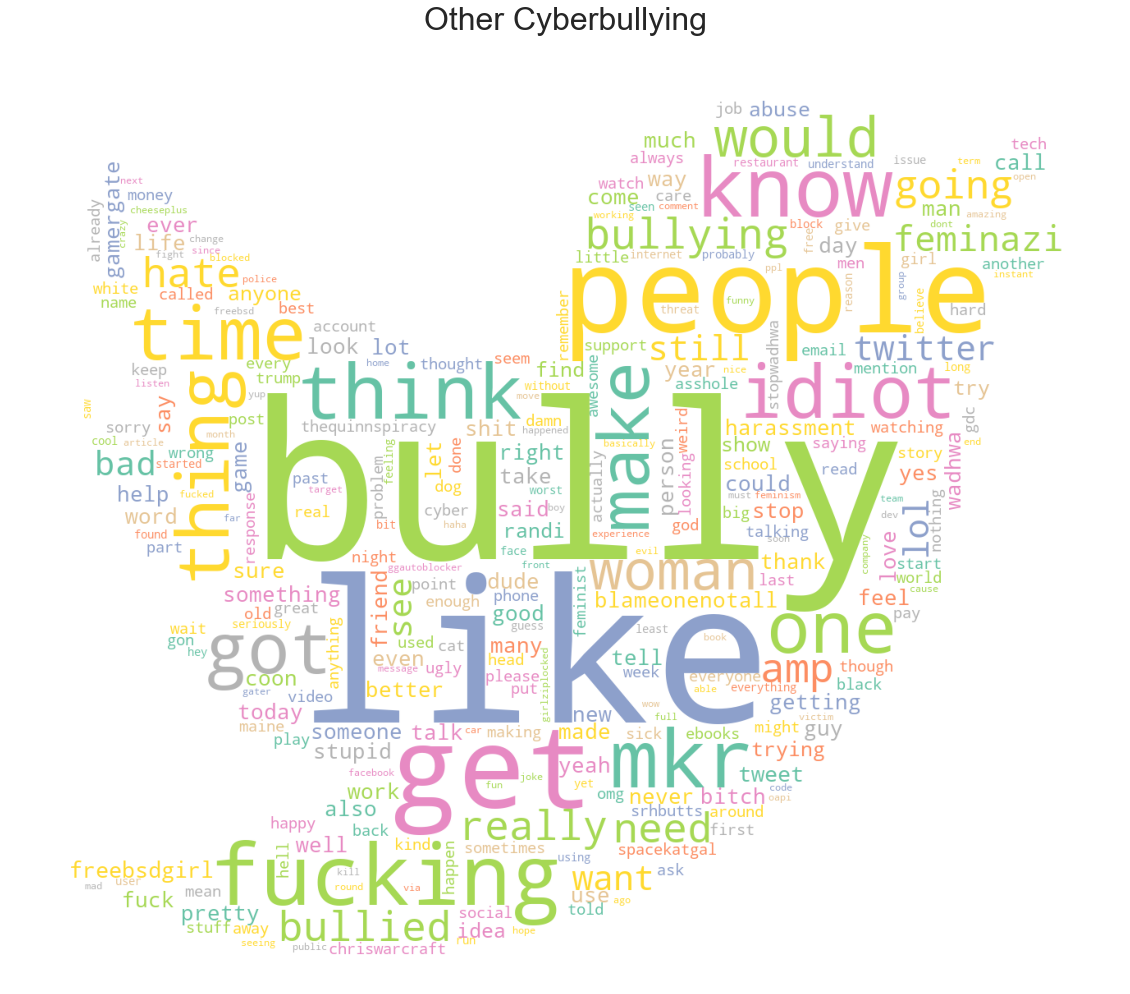

In [18]:
# wordcloud for other cyberbullying tweets
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
    mask=twitter_mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'other_cyberbullying'].clean_tweet)))

plt.axis('off')
plt.title('Other Cyberbullying', fontsize=32, pad=20)
plt.imshow(wordcloud)
plt.savefig("../images/wordcloud-other-cyberbullying.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()